<a href="https://colab.research.google.com/github/MampiononaRajaoferason/TIme-Series-Analysis/blob/main/Simple_Moving_Average_and_Exponentially_Weighted_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# uploading a file from the local drive to google colab

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length = len(uploaded[fn])
  ))

Saving daily-total-female-births.csv to daily-total-female-births.csv
User uploaded file "daily-total-female-births.csv" with length 6220 bytes


In [15]:
import numpy as np
import pandas as pd
from pandas import read_excel
import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as matplotlib
import time

df = pd.read_csv('daily-total-female-births.csv', index_col='Date', parse_dates = False)

In [16]:
df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [17]:
df.tail()

,Births
Date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


<Axes: xlabel='Date'>

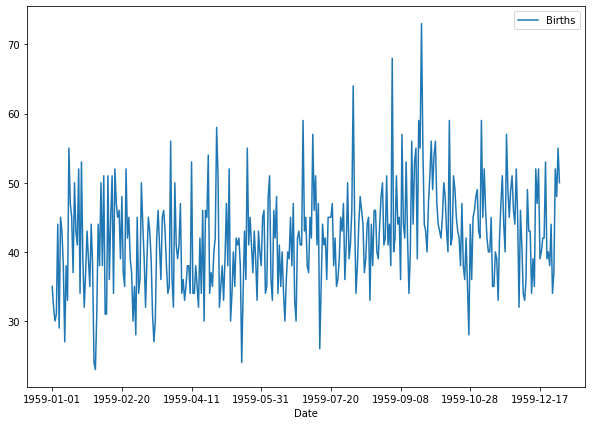

In [18]:
df.plot(figsize = (10,7))

# Simple Moving Average (SMA)

SMA is the unweighted mean of the previous k data points. If p1, p2…, pn are the time series data point and the mean over the last k data-points is denoted as SMAk then it can be calculated as:

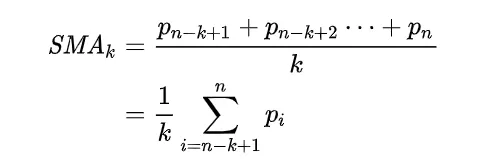




SMA can be implemented by using the rolling() method from pandas.Dataframe
General Syntax for the rolling function is

**DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method=’single’)**

In [19]:
# averaging over a window of 5 days
df['Mean'] = df.rolling(5).mean()
df.head(7)

,Births,Mean
Date,,
1959-01-01,35,NaN
1959-01-02,32,NaN
1959-01-03,30,NaN
1959-01-04,31,NaN
1959-01-05,44,34.4


<Axes: xlabel='Date'>

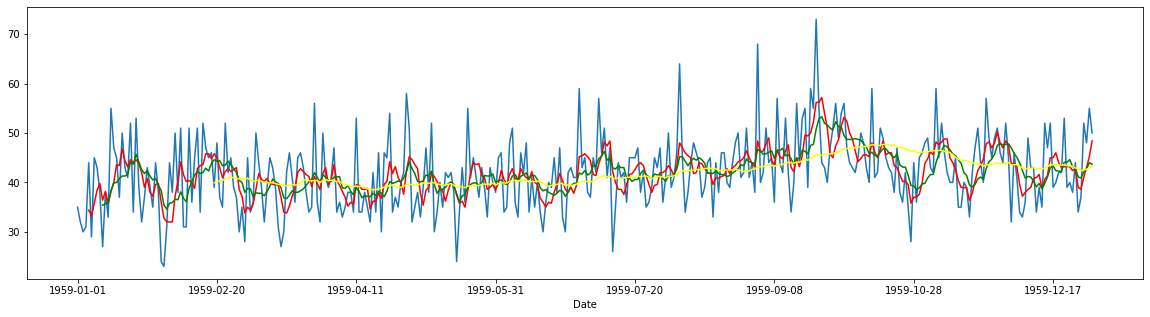

In [24]:
df['Births'].plot(figsize = (20,5))
df.rolling(5).mean()['Births'].plot(color = 'red') # moving avg over 5 days
df.rolling(10).mean()['Births'].plot(color = 'green') # over 10 days
df.rolling(50).mean()['Births'].plot(color = 'yellow') # over 50 days

# *Exponentially Weighted Moving Average (EWMA) or simply Exponentially Weighted Average (EWA)*
EWMA gives more weight to recent observations or it gives less and less weight to data as they are further removed in time, thus it can capture recent trends more quickly unlike SMA which will give the generic trend as the window is fixed and for the entire dataset.

**Implementation** : 
with **DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None)**

The adjust = True we have the regular formula of $ y_i=\beta \times y_{i-1} +  (1-\beta) \times \theta_i$ s.t $y_0 = 0$

In [36]:

df['EMA_False'] = df.iloc[:,0].ewm(span=5,adjust=False).mean()
df['EMA_True'] = df.iloc[:,0].ewm(span=5).mean()
df.head()

,Births,Mean,EMA_False,EMA_True
Date,,,,
1959-01-01,35,NaN,35.000000,35.000000
1959-01-02,32,NaN,34.000000,33.200000
1959-01-03,30,NaN,32.666667,31.684211
1959-01-04,31,NaN,32.111111,31.400000
1959-01-05,44,34.4,36.074074,36.236967


<Axes: xlabel='Date'>

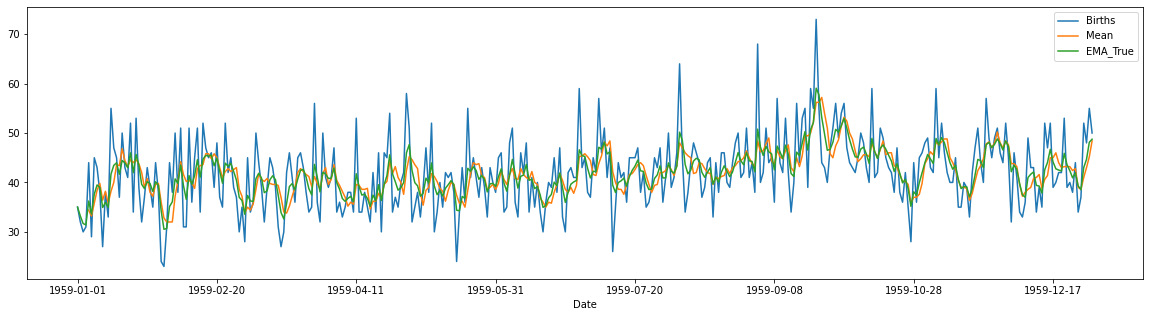

In [37]:
df[['Births', 'Mean', 'EMA_True']].plot(figsize = (20,5))

<Axes: xlabel='Date'>

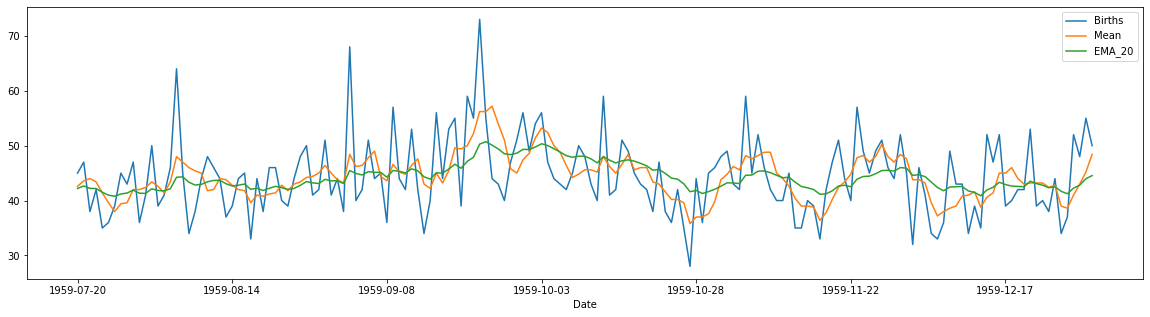

In [38]:
df['EMA_20'] = df.iloc[:,0].ewm(span=20).mean()
df[['Births','Mean','EMA_20']].iloc[200:365].plot(figsize=(20,5))